# Описание данных
Данные для первой части

Файл /datasets/hypothesis.csv. Скачать датасет

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл /datasets/orders.csv. Скачать датасет

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Описание проекта

Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

# Предобработка данных

In [1]:
# Добавим библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from pymystem3 import Mystem
from collections import Counter
from scipy import stats as st
import datetime as dt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')       

In [3]:
# Выведем основную информацию 
tables = [hypothesis, orders, visitors]

for t in tables:
    display(t.head())
    display(t.describe())
    display(t.info())
    display(t.duplicated().sum())  

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

0

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

0

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

0

In [4]:
# Приведем названия столбцов к единому стилю
hypothesis.columns = map(str.lower, hypothesis.columns)

In [5]:
# Посмотрим названия столбцов
hypothesis.columns.to_list()

['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [6]:
# Настроим отображение столбцов
pd.set_option('display.max_columns', None)

In [7]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [8]:
# Изменим данные о времени
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)  

In [9]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

# Вывод:
* Bзменили названия столбцов привед к единому стилю
* Изменили формат данных для дат
* Дубликаты и пропуски не обнаружены

# Часть 1. Приоритизация гипотез.

# Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [10]:
pd.set_option("max_colwidth", 999)

In [11]:
# Посчитаем ICE гипотез
hypothesis['ICE'] = ( hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


На первом месте гипотеза 8

# Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

In [12]:
# Посчитаем RICE гипотез
hypothesis['RICE'] = (hypothesis['reach'] *  hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(2)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


7 гипотеза лидирует

# Как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [13]:
# Посмотрим табличку 
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


В пятерке лучших одни и те же гипотезы а именно 0, 2, 6, 7, 8

При расчёте RICE на первом месте гипотеза под номером 7, а при ICE на первом месте гипотеза под номером 8

Это из за того что параметр 7 гипотизы - reach равен 10, а у остальных гипотез он меньше

Из за параметра охвата - Reach, использующегося в методе RICE изменил всю приоритетность по методу ICE

Нужно учитывать сколько пользователей гипотеза затронет

# Часть 2. Анализ A/B-теста

* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [14]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [15]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
# Посмотрим есть ли пользователи состоящие в обоих группах 
dup_users = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())
dup_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [17]:
# Удалим пользователей попавших в обе группы
orders = orders[~orders['visitorId'].isin(dup_users)]

In [18]:
np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())

array([], dtype=int64)

In [19]:
# Создаём массив уникальных пар
date_groups = orders[['date','group']].drop_duplicates()

# Получим агрегированные кумулятивные данные о заказах 
orders_aggregated = date_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Получим агрегированные кумулятивные данные о посетителях
visitorsAggregated = date_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Объединим кумулятивные данные в одной табличке
cumulative_data = orders_aggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# Переименуем столбцы
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


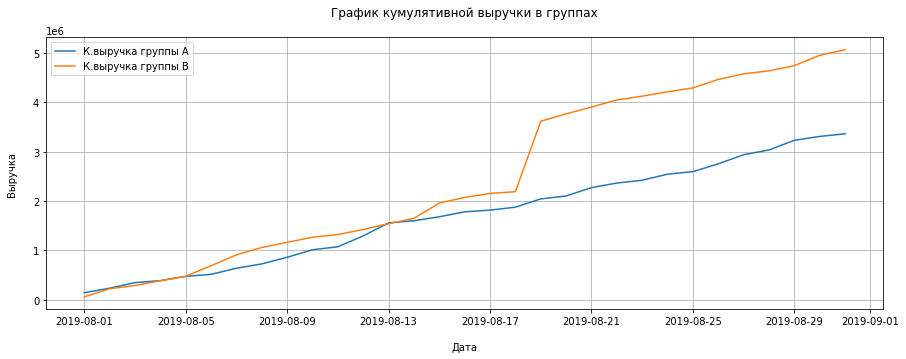

In [20]:
# Датафрейм с к.количеством заказов и к.выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
# Датафрейм с к.количеством заказов и к.выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15,5))
# Построим график выручки для группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='К.выручка группы A')
# Построим график выручки для группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='К.выручка группы B')
plt.title('График кумулятивной выручки в группах\n  ')
plt.xlabel('\nДата')
plt.ylabel('Выручка\n')
plt.grid()
plt.legend() ;

Видим резкий скачек в графике в группе В

Вероятно из за аномально большого количества заказов или аномально высокого среднего чека.

Период 18.08.2019 - 19.08.2019

Вывод:

На графике кумулятивной выручки в группах видно что кривая выручки группы B стабильно выше чем показатель группы А

Так же где-то в период 18-19 августа произошел ее резкий скачок из за которого разрыв между группами стал еще более значительным далее обе линии идут параллельно

Вероятнее всего такое резкое изменение произошло из-за крупных заказов

* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

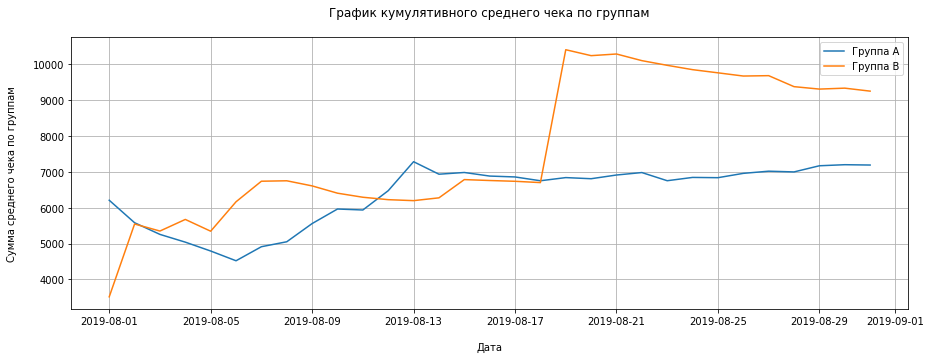

In [21]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='Группа A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='Группа B')
plt.title('График кумулятивного среднего чека по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Сумма среднего чека по группам\n')
plt.legend() ;

К.значение среднего чека по сегментам нестабильно. 

Возможно имеются выбросы искажающие общую картину.

Вывод

На графике мы видим что кривая группы В в период с 11 по 15 августа падает ниже уровня группы А но затем резко растет
Это подтверждает что в группе В в период 18-19 августа была крупная покупка которая увеличила размер кумулятивного среднего чека

* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

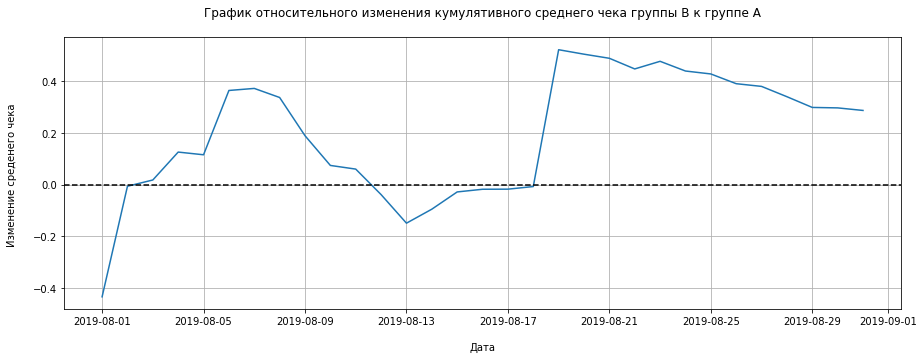

In [22]:
# Собирем все в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Построим отношение средних чеков
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A\n  ')
plt.xlabel('\nДата')
plt.ylabel('Изменение среденего чека \n')
# Добавим ось X
plt.axhline(y=0, color='black', linestyle='--') ;

Сомтря на график относительного различия в среднем чеке между группами видно как сильно меняются значения в определенные дни

Видимо тогда были совершены аномальные заказы

* Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

''

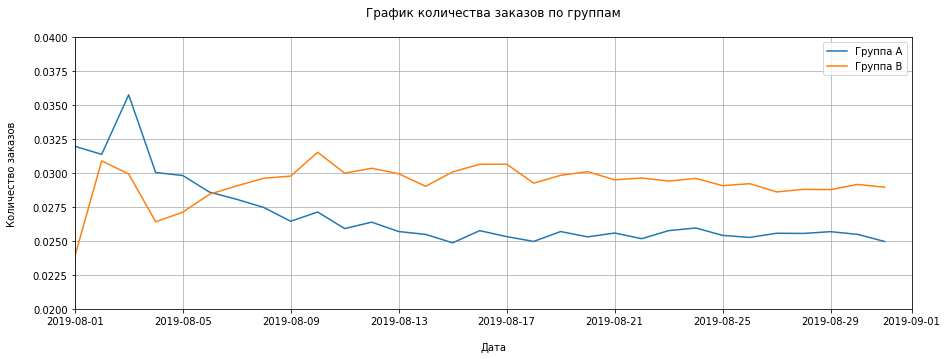

In [23]:
# Посчитаем количество заказов
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# Отделим данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# Отделим данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# Построим графики
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='Группа A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='Группа B')
plt.legend()
plt.title('График количества заказов по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Количество заказов\n')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.02, 0.04])
;

В начале Группа А имела большее количество заказов позже Группа В выровнялась и зафиксировалась больше значения Группы А

* Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

''

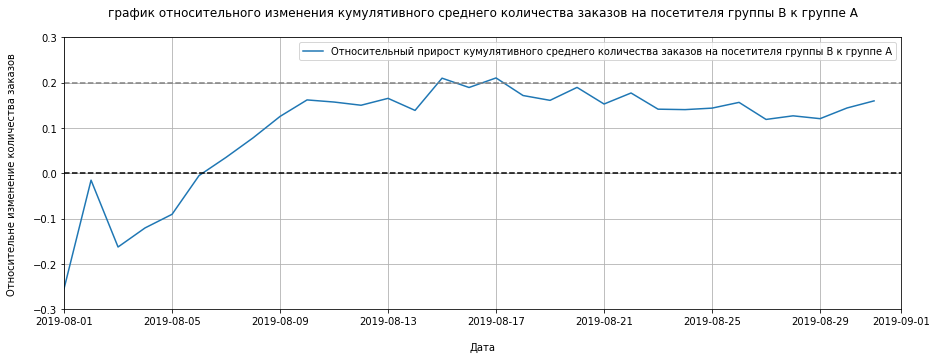

In [43]:
merged_сumulative_сonversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(merged_сumulative_сonversions['date'], merged_сumulative_сonversions['conversionB']/merged_сumulative_сonversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.3])
plt.title('график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A\n  ')
plt.xlabel('\nДата')
plt.ylabel('Относительне изменение количества заказов\n')
;

Почти в начале группа В лидирует по количеству заказов

Получила стабильные +15% относительно группы А

* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

''

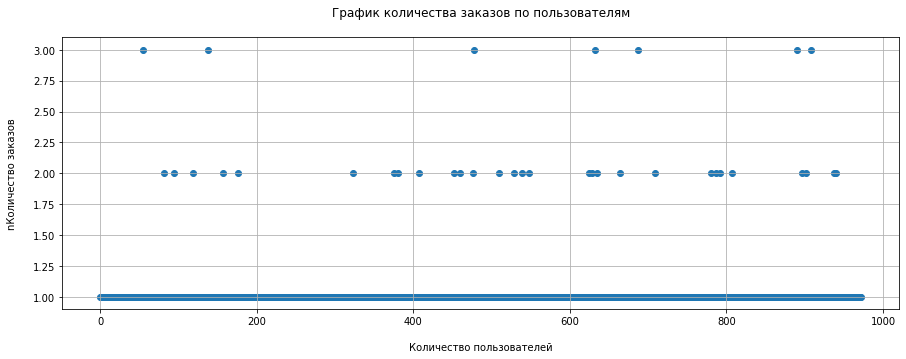

In [25]:
orders_by_users = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

orders_by_users.columns = ['user_id','orders']

orders_by_users.sort_values(by='orders',ascending=False).head(10)

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям\n  ')
plt.xlabel('\nКоличество пользователей')
plt.ylabel('nКоличество заказов\n')
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders']) 
;

Самое большое значение у пользователей совершивших один заказ

Совершивших 2 заказа значительно меньше

Совершивших 3 заказа меньше всего

Они будут являться выбросами стоит посчитать выборочные перцентили

* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [26]:
# Метод np.percentile('column', [percentile1, percentile2]) находит перцентили.
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[1. 2.]


95% пользователей овершают не больше 1 заказа

99% совершают 2 заказа

Аномальным будет всё что более этого

* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

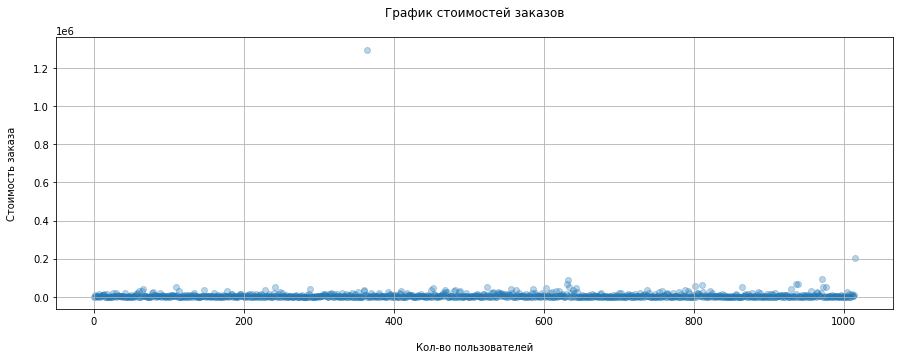

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов\n ')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Стоимость заказа\n')
plt.scatter(x_values, orders['revenue'], alpha=0.3);

Видим 2 аномальных значения

In [28]:
# Точные суммы аномальных заказов.
orders['revenue'].sort_values().tail()

743       67990
744       86620
1136      92550
1196     202740
425     1294500
Name: revenue, dtype: int64

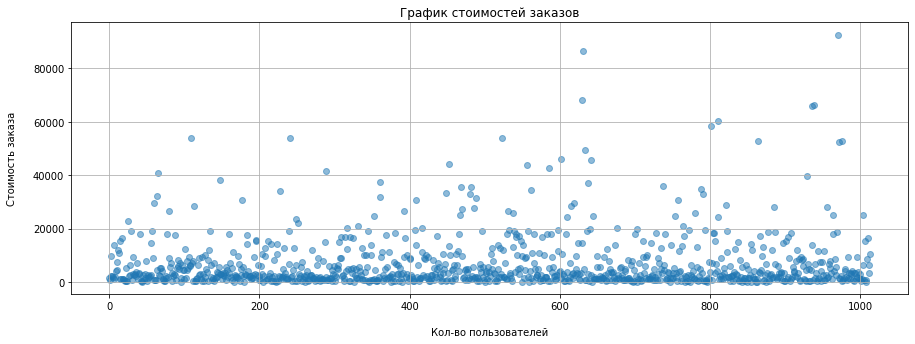

In [29]:
rate_orders = orders[orders['revenue']<=200000]['revenue']
xn_values = pd.Series(range(0,len(rate_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Стоимость заказа\n')
plt.scatter(xn_values, rate_orders, alpha=0.5);

Вывод

У подавляющего большинства пользователей обоих групп сумма заказа не превышает 10 тыс. рублей 

Порог заказов не превышает 100 тыс руб 

При этом на графике группы В можно заметить один аномально большой заказ, превышающий 1,2 млн.руб 

Судя по всему это и есть причина резкого скачка кумулятивного среднего чека 19 августа

* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [30]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более чем у 95% заказов чек выше 26785 рублей

Не более чем у 1% дороже 53904 рублей.

За границу для определения аномальных заказов примем значение 53904

* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

In [31]:
visitors_a_daily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitors_per_date_a' : 'sum'}), axis=1)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitors_per_date_b' : 'sum'}), axis=1)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

In [32]:
orders_a_daily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: \
        orders_a_daily[orders_a_daily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'orders_per_date_a' : 'sum',
                'revenue_per_date_a' : 'sum'}), axis=1).sort_values(by=['date'])
orders_a_cummulative.columns = ['date', 'orders_cummulative_a', 'revenue_cummulative_a']

orders_b_daily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: \
        orders_b_daily[orders_b_daily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'orders_per_date_b' : 'sum',
                'revenue_per_date_b' : 'sum'}), axis=1).sort_values(by=['date'])
orders_b_cummulative.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b']

In [33]:
data = orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')\
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')\
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')\
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')\
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')\
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')\
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Посчитаем статистическую значимость различия в количестве заказов между группами

In [34]:
orders_by_users_a = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_by_users_a.columns = ['userId', 'orders']

orders_by_users_b = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_by_users_b.columns = ['userId', 'orders']

In [35]:
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

Нулевая гипотеза - статистически значимых различий в количестве заказов между группами нет

Альтернативная гипотеза  - статистически значимые различия есть

In [42]:
display("alpha = 0.05")
display("p-value = {0:.3f}".format(st.mannwhitneyu(sample_a, sample_b, alternative = 'two-sided')[1]))
display("относительный прирост количества заказов группы B = {0:.3f}".format(sample_b.mean()/sample_a.mean()-1)) 

'alpha = 0.05'

'p-value = 0.011'

'относительный прирост количества заказов группы B = 0.160'

p-value - 0.011 меньше 0.05 

Поэтому нулевую гипотезу что статистически значимых различий в количестве заказов между группами нет - отвергаем

Это значит по "сырым" данным в количестве заказов между группами A и B есть статистически значимые различия

Относительный прирост группы В к А равен 16%

* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Нулевая гипотеза - статистически значимых различий в среднем чеке между группами нет

Альтернативная гипотеза - статистически значимые различия есть

In [37]:
display("alpha = 0.05")
display("p-value = {0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
display("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

'alpha = 0.05'

'p-value = 0.829'

"Относительный показатель 'B' и 'A' = 0.287"

p-value - 0.829 значительно больше 0.05 

Можно считать что значимых различий в среднем чеке между группами нет

По "сырым" данным средние чеки похожи

При этом средний чек группы B значительно выше среднего чека группы A почти на 29%

* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Срез пользователей

с числом заказов больше 2 — usersWithManyOrders

совершивших заказы дороже 53904 — usersWithExpensiveOrders

In [38]:
users_many_orders = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > 2]['userId'], orders_by_users_b[orders_by_users_b['orders'] > 2]['userId']], axis = 0)
users_expensive_orders = orders[orders['revenue'] > 53904]['visitorId']
deviant_users = pd.concat([users_many_orders, users_expensive_orders], axis = 0).drop_duplicates().sort_values()
display(deviant_users.head(5))
print("Всего аномальных пользователей =" ,len(deviant_users)) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64

Всего аномальных пользователей = 16


Посмотрим, как изменятся расчеты без участия аномальных пользователей

In [39]:
a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['userId'].isin(deviant_users))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), \
                                       name='orders')],axis=0)

b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['userId'].isin(deviant_users))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), \
                                       name='orders')],axis=0) 

Нулевая гипотеза - статистически значимых различий в количестве заказов между группами нет

Альтернативная гипотеза - статистически значимые различия есть

In [40]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(a_filtered, b_filtered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(b_filtered.mean()/a_filtered.mean()-1)) 

alpha = 0.05
p-value = 0.007
Относительный показатель 'B' и 'A' = 0.189


p-value - 0.007 меньше 0.05 

Нулевую гипотезу о статистически значимых различий в количестве заказов между группами нет отвергаем

По "очищенным" данным в количестве заказов групп A и B есть статистически значимые различия 

А относительный выигрыш группы "B" над "A" равен почти 19% выше чем с «сырыми» данными - 16%

* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


Нулевая гипотеза примем - статистически значимых различий в средних чеках между группами нет

Альтернативная гипотеза - статистически значимые различия есть

In [41]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(deviant_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(deviant_users)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель В и А = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(deviant_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(deviant_users)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.788
Относительный показатель В и А = -0.032


p-value - 0.788 значительно больше 0.05

Можно считать что в среднем чеке нет различий как и с "сырыми" данными

Средний чек группы B оказался незначительно ниже среднего чека группы A в то время как по "сырым" данным он был больше почти на 29%

* Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Мы выяснили что у группы В количество заказов выше на 19% по "очищенным" данным и на 16% по "сырым" 

Средние чеки групп по "очищенным данным" примерно одинаковые

Основываясь на результатах проведенного А/В теста сотит остановить тест и зафиксировать победу группы В по показателю количеству заказов 

Отделу маркетинга стоит начать работу по стимуляции к увеличению среднего чека